In [ ]:
import pandas as pd
import numpy as np
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [ ]:
words_corpus = pd.read_csv('/content/preprocessed_PCA_newdf.xls')
words_corpus.head()

,Unnamed: 0,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Word
0,0,-0.135994,0.700704,-0.243845,-0.206682,0.012245,-0.134163,-0.034946,-0.000948,-0.006617,-0.013265,AFRAID
1,1,-0.164038,0.618974,-0.239514,-0.225620,-0.008237,-0.104077,0.035675,-0.012855,0.037187,-0.017356,AFRAID
2,2,-0.657468,-0.421108,-0.262696,0.028364,-0.147318,-0.037199,0.045543,-0.030400,-0.004434,-0.017793,AFRAID
3,3,-0.494670,-1.286647,-0.145833,0.209014,-0.183054,0.073933,0.122878,0.001645,0.105372,-0.058780,AFRAID
4,4,0.027746,-0.361878,-0.233952,-0.186101,-0.093658,0.032019,0.083742,0.005980,0.026283,-0.025037,AFRAID


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [ ]:
words_corpus.shape

(13540, 12)

In [ ]:
words_corpus.drop(["Unnamed: 0"], inplace=True, axis=1)

In [ ]:

words_corpus.shape

(13540, 11)

In [ ]:
words_corpus["Word"].value_counts()

,count
Word,
Z,200
9,200
H,200
G,200
F,200
...,...
HURT,75
HUNGRY,75
HOW,75


In [ ]:
words_corpus["Word"].unique()

array(['AFRAID', 'ANGRY', 'APPRECIATE', 'BAD', 'BED', 'BORED', 'CLASS',
       'COLD', 'COLLEGE_SCHOOL', 'COMB', 'COME', 'CONGRATULATIONS',
       'CRYING', 'DARE', 'DIFFERENCE', 'DISAPPOINTED', 'DO', 'FAVOUR',
       'FEVER', 'FINE', 'FOOD', 'FREE', 'FRIEND', 'FROM', 'GO', 'GOOD',
       'GRATEFUL', 'HAD', 'HAPPY', 'HEAR', 'HEART', 'HELLO_HI', 'HELP',
       'HIDING', 'HOW', 'HUNGRY', 'HURT', 'I_ME_MINE_MY', 'KIND', 'LEAVE',
       'LIKE_LOVE', 'MEAN IT', 'MEDICINE', 'MEET', 'NAME', 'NICE',
       'OLD_AGE', 'OUTSIDE', 'PHONE', 'PLACE', 'POUR', 'PREPARE',
       'PROMISE', 'REALLY', 'REPEAT', 'ROOM', 'SHIRT', 'SITTING', 'SLEEP',
       'SLOWER', 'SO MUCH', 'SOFTLY', 'SOME ONE', 'SOMETHING', 'SORRY',
       'SPEAK', 'STOP', 'SURE', 'TAKE CARE', 'TAKE TIME', 'TALK', 'TELL',
       'THANK', 'THAT', 'THINGS', 'THINK', 'THIRSTY', 'TIRED', 'TODAY',
       'TRUST', 'TRUTH', 'TURN ON', 'UNDERSTAND', 'WANT', 'WATER', 'WEAR',
       'WELCOME', 'WHAT', 'YOU', '1', '2', '3', '4', '5', '6', '7', '

In [ ]:
words_corpus["Word"].nunique()

124

In [ ]:
def sample_or_keep(group):
    return group.sample(n=min(len(group), 100), random_state=42)  # Set random_state for reproducibility

# Group by 'Word' column and apply sampling
# sampled_words_df = words_corpus.groupby('Word', group_keys=False).apply(sample_or_keep)

In [ ]:
# sampled_words_df

In [ ]:
# sampled_words_df["Word"].value_counts()

In [ ]:
new_words_df = words_corpus.copy()

In [ ]:
new_words_df.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Word
0,-0.135994,0.700704,-0.243845,-0.206682,0.012245,-0.134163,-0.034946,-0.000948,-0.006617,-0.013265,AFRAID
1,-0.164038,0.618974,-0.239514,-0.225620,-0.008237,-0.104077,0.035675,-0.012855,0.037187,-0.017356,AFRAID
2,-0.657468,-0.421108,-0.262696,0.028364,-0.147318,-0.037199,0.045543,-0.030400,-0.004434,-0.017793,AFRAID
3,-0.494670,-1.286647,-0.145833,0.209014,-0.183054,0.073933,0.122878,0.001645,0.105372,-0.058780,AFRAID
4,0.027746,-0.361878,-0.233952,-0.186101,-0.093658,0.032019,0.083742,0.005980,0.026283,-0.025037,AFRAID


In [ ]:
new_words_df.isna().sum()

,0
Feature-1,0
Feature-2,0
Feature-3,0
Feature-4,0
Feature-5,0
Feature-6,0
Feature-7,0
Feature-8,0
Feature-9,0
Feature-10,0


In [ ]:
new_words_df.shape

(13540, 11)

In [ ]:
df = new_words_df.copy()

In [ ]:
inputs = df.drop(['Word'], axis=1)
targets = df['Word']

In [ ]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [ ]:
scaled_inputs = std_scaler.fit_transform(inputs)

In [ ]:
scaled_inputs[1]

array([-0.23250583,  1.25815684, -0.56081109, -0.83076808, -0.03495547,
       -0.52968139,  0.21096093, -0.08499601,  0.30116909, -0.16710153])

In [ ]:
scaled_inputs[1].shape

(10,)

In [ ]:
encoder = LabelEncoder()
target = encoder.fit_transform(targets)

In [ ]:
type(target)

numpy.ndarray

In [ ]:
inputs_train, inputs_test, target_train, target_test = train_test_split(scaled_inputs, target, test_size=0.11, random_state=369)

In [ ]:
inputs_train.shape

(12050, 10)

In [ ]:
def np_data(data):
  labels = np.array(data)

  return labels

In [ ]:
## Convertint pandas data to numpy
numpy_train_inputs = np_data(inputs_train)
numpy_train_target = np_data(target_train)
numpy_test_inputs = np_data(inputs_test)
numpy_test_target = np_data(target_test)

In [ ]:
# Converting from numpy to tensors and passing it to GPU
tensor_train_inputs = torch.from_numpy(numpy_train_inputs).to(device)
tensor_train_targets = torch.from_numpy(numpy_train_target).to(device)
tensor_test_inputs = torch.from_numpy(numpy_test_inputs).to(device)
tensor_test_targets = torch.from_numpy(numpy_test_target).to(device)

In [ ]:
tensor_test_inputs.shape

torch.Size([1490, 10])

In [ ]:
print(tensor_train_inputs.device)

cuda:0


In [ ]:
# Train Dataset
train_dataset = TensorDataset(tensor_train_inputs, tensor_train_targets)
# Test Dataset
test_dataset = TensorDataset(tensor_test_inputs, tensor_test_targets)

In [ ]:
test_dataset.tensors[0].shape

torch.Size([1490, 10])

In [ ]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)

In [ ]:
# obtaining one batch of training data to check the shape
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output size: ', sample_y.size())
print('Sample output: \n', sample_y)

Sample input size:  torch.Size([16, 10])
Sample input: 
 tensor([[ 8.8914e-01, -7.3814e-01,  6.5369e-01,  1.4938e-01,  1.2093e+00,
         -5.6973e-01,  2.4518e+00,  1.3602e+00, -4.0266e-01,  7.0390e-01],
        [-6.6983e-01, -1.8667e+00, -8.3589e-01,  7.9210e-01, -6.4168e-01,
          4.1606e-02,  9.0878e-01, -5.9734e-01,  9.7769e-01, -3.8173e-01],
        [-5.7744e-01, -1.0814e+00, -6.1684e-01, -4.2262e-01,  1.0468e+00,
         -1.1271e+00,  1.1177e+00,  2.0574e-01,  3.5240e-01,  4.6222e-01],
        [-1.0880e+00, -1.6146e+00, -7.8008e-01,  7.6086e-01, -9.0351e-01,
         -1.6822e-01,  4.5264e-01, -2.4115e-03,  1.6529e-02, -1.4827e-01],
        [-2.5688e+00,  6.1521e-01, -5.7837e-01,  2.2731e-01, -4.8124e-01,
          2.3828e-02,  1.2499e-02,  3.0613e-01, -5.7799e-01, -2.4871e-01],
        [-5.2769e-01,  1.4034e+00, -4.2941e-01, -6.1272e-01,  1.4694e-01,
         -8.0718e-01, -9.5283e-02,  4.1910e-02, -1.6578e-01, -4.9006e-01],
        [ 6.7608e-01, -1.2591e-01, -8.4268e-01, -

**Building a Model**

In [ ]:

# ?nn.LSTM

In [ ]:
class LSTM_Model(nn.Module):
  def __init__(self, input_size, layers, hidden_dim, output_size):
    super(LSTM_Model, self).__init__()

    self.input_size = input_size
    self.layers = layers
    self.hidden_dim = hidden_dim
    self.output_size = output_size

    # lstm
    self.lstm = nn.LSTM(input_size = self.input_size,
                        hidden_size = self.hidden_dim,
                        num_layers = self.layers,
                        bias = True,
                        )

    # Fully connected layer | Output layer
    self.output_layer = nn.Linear(self.hidden_dim, self.output_size)

  def forward(self, inputs, hidden_inputs):

    # Ensure inputs and hidden states are of type float32
    inputs = torch.tensor(inputs, dtype=torch.float32)
    hidden_inputs = (
        torch.tensor(hidden_inputs[0], dtype=torch.float32),
        torch.tensor(hidden_inputs[1], dtype=torch.float32)
    )

    # LSTM expects input of shape (seq_length, batch_size, input_size)
    inputs = inputs.unsqueeze(0)  # Add sequence length dimension if needed

    # Pass through LSTM
    lstm_outputs, hidden_outputs = self.lstm(inputs, hidden_inputs)

    # Reshape LSTM outputs to (batch_size, hidden_dim)
    lstm_outputs = lstm_outputs.squeeze(0)  # Remove sequence length dimension

    # Pass through the fully connected layer
    outputs = self.output_layer(lstm_outputs)  # Shape: (batch_size, output_size)

    # outputs = F.softmax(outputs, dim=1)

    return outputs, hidden_outputs


In [ ]:
# sequence length should be no.of frames that are representing ne word, in this case I making sequence length to 28
# the frames are not consistent, so I will be using augmentation method (creating the data by applying simple transformations)
# input_size i.i., no.of features(columns in simple terms) is 64
# hidden_inputs shape will be (sequence_length, batch_size, n_layers)
# inputs shape will be (sequence_length, batch_size, input_size)

In [ ]:
input_size = 10    ## input features
hidden_layers = 5
hidden_dim = 512
output_size = 124
seq_length = 75

In [ ]:
# ## demo
h0 = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
c0 = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
h = (h0, c0)
inputs = sample_x

model = LSTM_Model(input_size, hidden_layers, hidden_dim, output_size).to(device)
outputs, hidden_outputs = model(inputs, h)

In [ ]:
model

LSTM_Model(
  (lstm): LSTM(10, 512, num_layers=5)
  (output_layer): Linear(in_features=512, out_features=124, bias=True)
)

In [ ]:
h0.device

device(type='cuda', index=0)

In [ ]:
sample_x.shape[0]

16

In [ ]:
outputs.shape

torch.Size([16, 124])

In [ ]:
sample_y.shape

torch.Size([16])

In [ ]:
# Set the random seed for reproducibility
seed = 369  # You can choose any integer value

# Set seeds for Python's built-in random module, numpy, and PyTorch
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# If using GPU (CUDA), set the seed for the GPU too
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # If you have multiple GPUs
torch.backends.cudnn.deterministic = True  # Ensures deterministic behavior
torch.backends.cudnn.benchmark = False  # Disable non-deterministic algorithms

In [ ]:
## model building
model = LSTM_Model(input_size, hidden_layers, hidden_dim, output_size).to(device)
## optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
## loss function
loss_fun = nn.CrossEntropyLoss()
# loss_fun = nn.MSELoss()

In [ ]:
def training_model(nepochs, train_loader, model, optimizer, loss_fun):

  nepochs = nepochs

  training_loss = np.zeros(nepochs)
  training_acc = np.zeros(nepochs)

  for epoch in range(nepochs):

    batch_loss = []
    batch_acc = []

    for train_x, train_y in train_loader:

      batch_size = train_x.shape[0]
      ht = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
      ct = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
      hidden_inputs = (ht, ct)

      outputs, hidden_outputs = model(train_x, hidden_inputs)

      loss = loss_fun(outputs, train_y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ## appending loss to the batch_loss
      batch_loss.append(loss.item())

      outputs = outputs.cpu()
      train_y = train_y.cpu()

      matches = torch.argmax(outputs, axis=1) == train_y
      matchesNumeric = matches.float()
      accuracyPct = 100 * torch.mean(matchesNumeric)

      ## appending accuracy to the batch_acc
      batch_acc.append(accuracyPct.cpu().item())

    if epoch % 5 == 0:
      print(f"epoch {epoch} loss: {np.mean(batch_loss)}, acc: {np.mean(batch_acc)}")

    training_loss[epoch] = np.mean(batch_loss)
    training_acc[epoch] = np.mean(batch_acc)

  return training_loss, training_acc


In [ ]:
training_loss, training_acc = training_model(21, train_loader, model, optimizer, loss_fun)

epoch 0 loss: 3.402946847819523, acc: 14.207559681697612
epoch 5 loss: 1.1836103749132916, acc: 65.65815649867373
epoch 10 loss: 0.7036708356610027, acc: 77.91777188328912
epoch 15 loss: 0.4482706307012968, acc: 85.19562334217507
epoch 20 loss: 0.2849266933022803, acc: 90.47579575596816


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Training Accuracy')

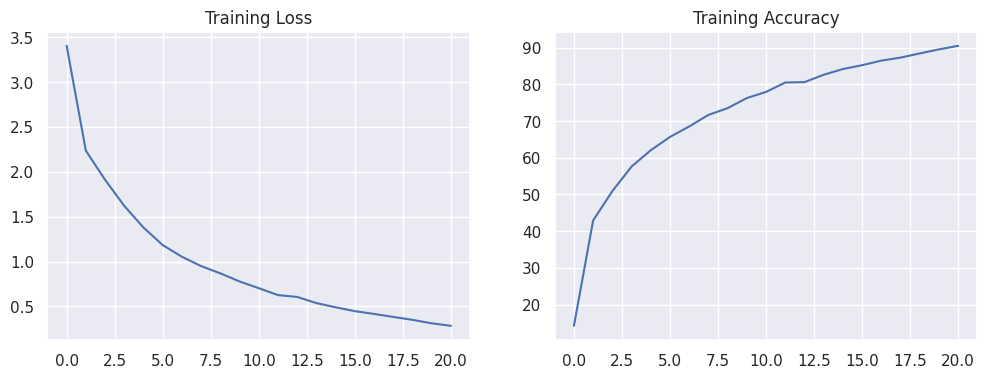

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1.plot(training_loss)
ax2.plot(training_acc)

ax1.set_title("Training Loss")
ax2.set_title("Training Accuracy")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

def testing_model():
  with torch.no_grad():
      all_preds = []
      all_labels = []
      batch_test_loss = []

      for tex_x, test_y in test_loader:
          batch_size = tex_x.shape[0]
          ht = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
          ct = torch.zeros(hidden_layers, batch_size, hidden_dim).to(device)
          hidden_inputs = (ht, ct)

          outputs, hidden_outputs = model(tex_x, hidden_inputs)

          # Compute loss
          loss = loss_fun(outputs, test_y)
          batch_test_loss.append(loss.item())

          outputs = outputs.cpu()
          test_y = test_y.cpu()

          # Predictions and true labels
          predictions = torch.argmax(outputs, axis=1)
          all_preds.extend(predictions.cpu().numpy())
          all_labels.extend(test_y.cpu().numpy())

      # Compute metrics
      test_loss = np.mean(batch_test_loss)
      accuracy = accuracy_score(all_labels, all_preds)
      f1 = f1_score(all_labels, all_preds, average='weighted')  # Use 'weighted' for class imbalance
      recall = recall_score(all_labels, all_preds, average='weighted')

      # Convert numeric labels back to original labels
      original_labels = encoder.inverse_transform(all_labels)
      predicted_labels = encoder.inverse_transform(all_preds)

      # Print each original and predicted label pair
      # for orig, pred in zip(original_labels, predicted_labels):
      #     print(f"Original: {orig}, Predicted: {pred}")

      # Display metrics
      print(f"\nTest Loss: {test_loss}")
      print(f"Test Accuracy: {accuracy * 100:.2f}%")
      print(f"Test F1-Score: {f1:.2f}")
      print(f"Test Recall: {recall:.2f}")

      return predicted_labels, original_labels


In [ ]:
predicted_labels, original_labels = testing_model()


Test Loss: 0.6109492662263677
Test Accuracy: 84.16%
Test F1-Score: 0.84
Test Recall: 0.84


In [ ]:
test_labels_df = pd.DataFrame({'Original': original_labels, 'Predicted': predicted_labels})

In [ ]:
test_labels_df

,Original,Predicted
0,K,K
1,SPEAK,SPEAK
2,TRUTH,TRUTH
3,OLD_AGE,OLD_AGE
4,E,E
...,...,...
1485,W,W
1486,SURE,SURE
1487,J,J
1488,R,R


In [ ]:
# Add a column to indicate whether the prediction was correct
test_labels_df['Correct'] = test_labels_df['Original'] == test_labels_df['Predicted']

# Group by the 'Original' column and calculate percentages
accuracy_per_word = test_labels_df.groupby('Original').agg(
    Total=('Correct', 'count'),       # Total occurrences of each word
    Correct_Count=('Correct', 'sum')  # Number of correct predictions
)

# Add a percentage column
accuracy_per_word['Accuracy_Percentage'] = (accuracy_per_word['Correct_Count'] / accuracy_per_word['Total']) * 100

# Reset the index for easier viewing
accuracy_per_word = accuracy_per_word.reset_index()

# Display the DataFrame
print(accuracy_per_word.sort_values(by="Accuracy_Percentage", ascending=False))


            Original  Total  Correct_Count  Accuracy_Percentage
0                  1     24             24           100.000000
31                 F     17             17           100.000000
39                 G     24             24           100.000000
48          HELLO_HI      6              6           100.000000
50            HIDING      7              7           100.000000
52            HUNGRY      3              3           100.000000
54                 I     18             18           100.000000
56                 J     28             28           100.000000
57                 K     14             14           100.000000
59                 L     24             24           100.000000
1                  2     27             27           100.000000
66                 N     24             24           100.000000
69                 O     22             22           100.000000
71           OUTSIDE      6              6           100.000000
72                 P     14             

In [ ]:
accuracy_per_word.to_csv('accuracy_per_word.csv', index=False)

In [ ]:
incorrect_predictions_df = test_labels_df[test_labels_df['Original'] != test_labels_df['Predicted']]

In [ ]:
incorrect_predictions_df.shape

(236, 2)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
print(incorrect_predictions_df)

            Original        Predicted
5               HURT             FREE
6               FOOD          OLD_AGE
12           THIRSTY             ROOM
23            THINGS            FEVER
25           PROMISE           FAVOUR
32             PHONE            TIRED
35           OLD_AGE            SORRY
43    COLLEGE_SCHOOL        TAKE CARE
53      I_ME_MINE_MY            SORRY
54              COME          WELCOME
60             SORRY            THANK
68              COME          WELCOME
69             ANGRY       UNDERSTAND
70             PHONE          OLD_AGE
71               BED   COLLEGE_SCHOOL
78             PHONE            FEVER
83              FOOD          SITTING
104            TRUST             COLD
117             MEET           REALLY
121           AFRAID            TRUTH
122           CRYING           FAVOUR
128            TODAY            TRUTH
129         MEDICINE            THINK
137             NICE             DARE
138             STOP            PLACE
148         

In [ ]:
unique_words = incorrect_predictions_df["Original"].value_counts().sort_values(ascending=False)

In [ ]:
len(unique_words)

78

In [ ]:
import pickle

# pickle.dump(model, open('words_model.pkl', 'wb'))
# pickle.dump(std_scaler, open('words_std_scaler.pkl', 'wb'))
# pickle.dump(encoder, open('words_labelencoder.pkl', 'wb'))

In [ ]:
# torch.save(model.state_dict(), 'lstm_model.pt')

In [ ]:
encoder.classes_

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'AFRAID',
       'ANGRY', 'APPRECIATE', 'B', 'BAD', 'BED', 'BORED', 'C', 'CLASS',
       'COLD', 'COLLEGE_SCHOOL', 'COMB', 'COME', 'CONGRATULATIONS',
       'CRYING', 'D', 'DARE', 'DIFFERENCE', 'DISAPPOINTED', 'DO', 'E',
       'F', 'FAVOUR', 'FEVER', 'FINE', 'FOOD', 'FREE', 'FRIEND', 'FROM',
       'G', 'GO', 'GOOD', 'GRATEFUL', 'H', 'HAD', 'HAPPY', 'HEAR',
       'HEART', 'HELLO_HI', 'HELP', 'HIDING', 'HOW', 'HUNGRY', 'HURT',
       'I', 'I_ME_MINE_MY', 'J', 'K', 'KIND', 'L', 'LEAVE', 'LIKE_LOVE',
       'M', 'MEAN IT', 'MEDICINE', 'MEET', 'N', 'NAME', 'NICE', 'O',
       'OLD_AGE', 'OUTSIDE', 'P', 'PHONE', 'PLACE', 'POUR', 'PREPARE',
       'PROMISE', 'Q', 'R', 'REALLY', 'REPEAT', 'ROOM', 'S', 'SHIRT',
       'SITTING', 'SLEEP', 'SLOWER', 'SO MUCH', 'SOFTLY', 'SOME ONE',
       'SOMETHING', 'SORRY', 'SPEAK', 'STOP', 'SURE', 'T', 'TAKE CARE',
       'TAKE TIME', 'TALK', 'TELL', 'THANK', 'THAT', 'THINGS', 'THINK',
       'THIRST

In [ ]:
# original_labels = encoder.inverse_transform(targets)
# original_labels